In [ ]:
%timeit A = integer_spiral(7)
print(A)

133 µs ± 10.5 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
[[1001001. 1001000. 1000999. ... 1000003. 1000002. 1000001.]
 [1001002.  997003.  997002. ...  996006.  996005. 1000000.]
 [1001003.  997004.  993013. ...  992017.  996004.  999999.]
 ...
 [1001999.  998000.  994009. ...  991021.  995008.  999003.]
 [1002000.  998001.  994010. ...  995006.  995007.  999002.]
 [1002001.  998002.  998003. ...  998999.  999000.  999001.]]


In [ ]:

import time

def timeit(func, n, repeat, number):
    timings = []
    for i in range(repeat):
        start = time.monotonic()
        for j in range(number):
            func(n)
        end = time.monotonic()
        timings.append(end - start)
    return min(timings)

n = np.array((np.logspace(0.5, 3, 20)//2)*2 + 1, dtype=int)
time1 = np.zeros(n.size)
time2 = np.zeros(n.size)

for i, nn in enumerate(n):
    if nn < 20:
        time1[i] = timeit(integer_spiral, nn, repeat=300, number=10)
        time2[i] = timeit(integer_spiral2, nn, repeat=300, number=10)
    elif nn < 100:
        time1[i] = timeit(integer_spiral, nn, repeat=30, number=1)
        time2[i] = timeit(integer_spiral2, nn, repeat=30, number=1)
    else:
        time1[i] = timeit(integer_spiral, nn, repeat=3, number=2)
        time2[i] = timeit(integer_spiral2, nn, repeat=3, number=2)
    print(f"{nn = }, {time1[i] = }, {time2[i] = }")


nn = 3, time1[i] = 0.00032813000143505633, time2[i] = 9.618201875127852e-05
nn = 5, time1[i] = 0.0006531050021294504, time2[i] = 0.0003086889919359237
nn = 5, time1[i] = 0.000677358009852469, time2[i] = 0.00026515399804338813
nn = 7, time1[i] = 0.0009612129942979664, time2[i] = 0.0005287899984978139
nn = 11, time1[i] = 0.001604611985385418, time2[i] = 0.001205639011459425
nn = 15, time1[i] = 0.0022600750089623034, time2[i] = 0.002264415001263842
nn = 19, time1[i] = 0.00284783000824973, time2[i] = 0.0036241229972802103
nn = 27, time1[i] = 0.00041149999015033245, time2[i] = 0.0007251000206451863
nn = 35, time1[i] = 0.0005522360152099282, time2[i] = 0.0012472860107664019
nn = 49, time1[i] = 0.0007539789949078113, time2[i] = 0.0024026900064200163
nn = 65, time1[i] = 0.001032059983117506, time2[i] = 0.004747992992633954
nn = 89, time1[i] = 0.0017382600053679198, time2[i] = 0.008448766981018707
nn = 119, time1[i] = 0.004172674001893029, time2[i] = 0.030589807021897286
nn = 163, time1[i] = 0.

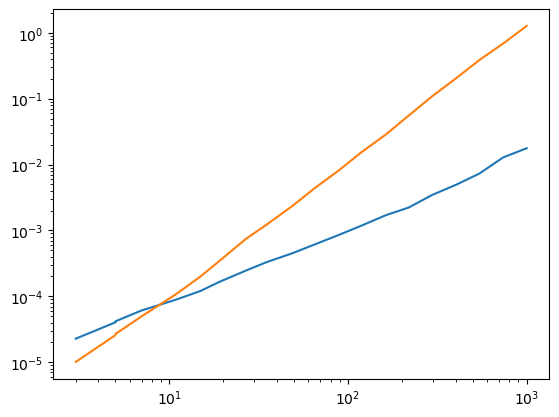

In [ ]:
plt.plot(n, time1)
plt.plot(n, time2)
# set y scale to logarithmic
plt.yscale('log')
plt.xscale('log')
plt.show()

time1 má exponent 1.110426187765268
time2 má exponent 2.041028657535971


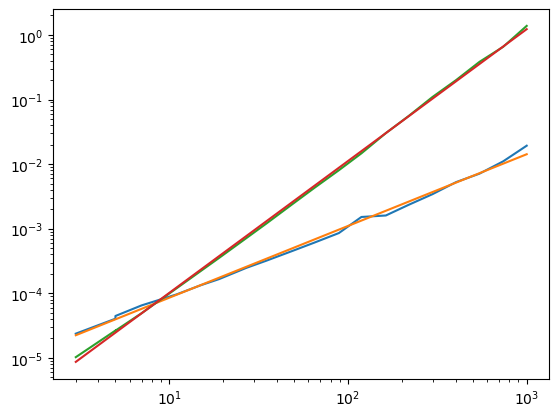

In [ ]:
plt.plot(n, time1)
p = np.polyfit(np.log(n), np.log(time1), deg=1)
print(f"time1 má exponent {p[0]}")
plt.plot(n, np.exp(p[1])*n**p[0])
plt.plot(n, time2)
p = np.polyfit(np.log(n), np.log(time2), deg=1)
print(f"time2 má exponent {p[0]}")
plt.plot(n, np.exp(p[1])*n**p[0])

# set y scale to logarithmic
plt.yscale('log')
plt.xscale('log')
plt.show()



In [ ]:
import numpy as np
from scipy.optimize import curve_fit


def non_neg_poly(x, *coeffs):
    return np.polyval(coeffs, x)


x = n
y = time2

popt, pcov = curve_fit(non_neg_poly, x, y, p0=[1, 1, 1, 1, 1], bounds=(0, np.inf))

print("Coefficients: ", popt)


Coefficients:  [4.04892617e-19 2.30233278e-20 1.70793790e-06 1.09785512e-04
 3.37051628e-10]


In [1]:
import numpy as np
import numba as nb
import matplotlib.pyplot as plt


def mandelbrot_set(xmin, xmax, ymin, ymax, width, height, max_iterations = 200):
    cr, ci = np.meshgrid(np.linspace(xmin, xmax, width), np.linspace(ymin, ymax, height))
    counts = np.zeros_like(cr, dtype=int) + max_iterations

    mandelbrot_loop(cr, ci, counts, max_iterations)
    return counts


@nb.njit(nb.types.int64(nb.types.float64[:, :], nb.types.float64[:, :], nb.types.int64[:, :], nb.types.int64), parallel=True)
def mandelbrot_loop(cr, ci, counts, max_iterations):
    m, n = cr.shape

    for i in nb.prange(m):
        for j in range(n):
            count_loc = 0
            cr_loc = cr[i, j]
            ci_loc = ci[i, j]
            zr = cr_loc
            zi = ci_loc
            q = (cr_loc - 1 / 4)**2 + ci_loc**2
            if q * (q + (cr_loc - 1 / 4)) > 1 / 4 * ci_loc**2:
                while np.sqrt(zr**2 + zi**2) < 2 and count_loc < max_iterations:
                    zr, zi = zr**2 - zi**2 + cr_loc, 2 * zr * zi + ci_loc
                    count_loc += 1
                counts[i, j] = count_loc
    return 0


In [4]:

xmin, xmax, ymin, ymax = -2, 1, -1.5, 1.5
width, height = 1000, 1000
max_iterations = 100

counts = mandelbrot_set(xmin, xmax, ymin, ymax, width, height, max_iterations)


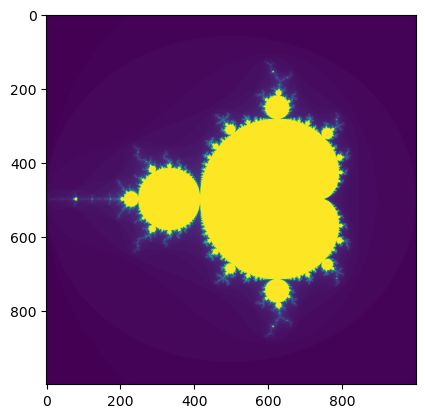

In [5]:
plt.imshow(counts)

In [ ]:
import pygame

# Define the window size and starting zoom level
WIDTH = 1000
HEIGHT = 1000
ZOOM = 1

# Define the initial coordinates for the Mandelbrot set
XMIN = -2
XMAX = 1
YMIN = -1.5
YMAX = 1.5

# Initialize Pygame
pygame.init()
pygame.display.set_caption("Mandelbrot Set")
screen = pygame.display.set_mode((WIDTH, HEIGHT))

# Define the colors to use for the Mandelbrot set
colors = np.zeros((32, 3), dtype=int)
colors[:, 0] = np.arange(32) * 8
colors[:, 1] = 255 - np.arange(32) * 8
colors[:, 2] = np.arange(32) * 8

# Define a function to convert a number of iterations to a color


def iterations_to_color(iterations):
    return colors[np.fliplr(np.transpose(iterations)) % 32]

# Define a function to convert screen coordinates to Mandelbrot coordinates


def screen_to_mandelbrot(x, y):
    mandelbrot_x = (x / WIDTH) * (XMAX - XMIN) + XMIN
    mandelbrot_y = ((HEIGHT - y) / HEIGHT) * (YMAX - YMIN) + YMIN
    return mandelbrot_x, mandelbrot_y


# Define the main loop
running = True
while running:
    # Calculate the Mandelbrot set for the current view
    mandelbrot = mandelbrot_set(XMIN, XMAX, YMIN, YMAX, WIDTH, HEIGHT,1000)

    # Convert the Mandelbrot matrix to a Pygame surface
    surface = pygame.surfarray.make_surface(iterations_to_color(mandelbrot))

    # Blit the surface onto the screen
    screen.blit(surface, (0, 0))

    # Update the screen
    pygame.display.update()

    # Handle events
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            running = False
        elif event.type == pygame.MOUSEBUTTONDOWN:
            # Zoom in using the mouse wheel
            zoom_point = screen_to_mandelbrot(*event.pos)
            if event.button == 4:
                ZOOM *= 2
            elif event.button == 5:
                ZOOM /= 2

            XMIN = zoom_point[0] - 1 / ZOOM
            XMAX = zoom_point[0] + 1 / ZOOM
            YMIN = zoom_point[1] - 1 / ZOOM
            YMAX = zoom_point[1] + 1 / ZOOM
            
pygame.quit()


In [ ]:
# naplnění matice spirálou čísel

import numpy as np
import matplotlib.pyplot as plt

def integer_spiral(n):
    # zde (aby mohl být kód trochu jednodušší) budeme trochu podvádět 
    # a uděláme matici o kousek větší (tedy nakonci nám zbyde nulový okraj)
    A = np.zeros((n + 2, n + 2))

    circles_around_center = int((n-1)/2)

    pos_row = int((n-1)/2 + 1)
    pos_col = int((n-1)/2 + 1)

    i = 1 # číslo, které se bude vkládat do matice

    # začneme ve středu, a jelikož je to trochu speciální případ, tak řešíme zvlášť
    A[pos_row, pos_col] = i
    i += 1
    pos_row += 1

    # kolik kruhů okolo středu musíme obkroužiz
    for circle_no in range(circles_around_center):
        # každý kruh má 4 strany, s délkou
        side_length = 2*circle_no + 2

        # čísla která se budou vkládat do matice
        numbers = np.linspace(i, i + side_length - 1, side_length)
        
        # dolní hrana
        A[pos_row, pos_col:(pos_col + side_length)] = numbers
        # upravíme pozici, aby se dalo pokračovat v další straně
        pos_col += side_length - 1
        pos_row -= 1
        
        # pravá hrana
        A[pos_row:(pos_row-side_length):-1, pos_col] = numbers + side_length
        # upravíme pozici, aby se dalo pokračovat v další straně
        pos_row -= side_length - 1
        pos_col -= 1
        
        # horní hrana
        A[pos_row, pos_col:(pos_col - side_length):-1] = numbers + 2*side_length
        # upravíme pozici, aby se dalo pokračovat v další straně
        pos_col -= side_length - 1
        pos_row += 1
        
        # levá hrana
        A[pos_row:(pos_row + side_length), pos_col] = numbers + 3*side_length
        # upravíme pozici, aby se dalo pokračovat v další straně
        pos_row += side_length
            
        # přičteme tolik, kolik čísel jsme vložili do matice    
        i += side_length * 4

    return A[1:-1, 1:-1] # ořízneme nulový okraj
